In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error
                             )
import pickle


In [2]:
df = pd.read_csv("../DATA/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


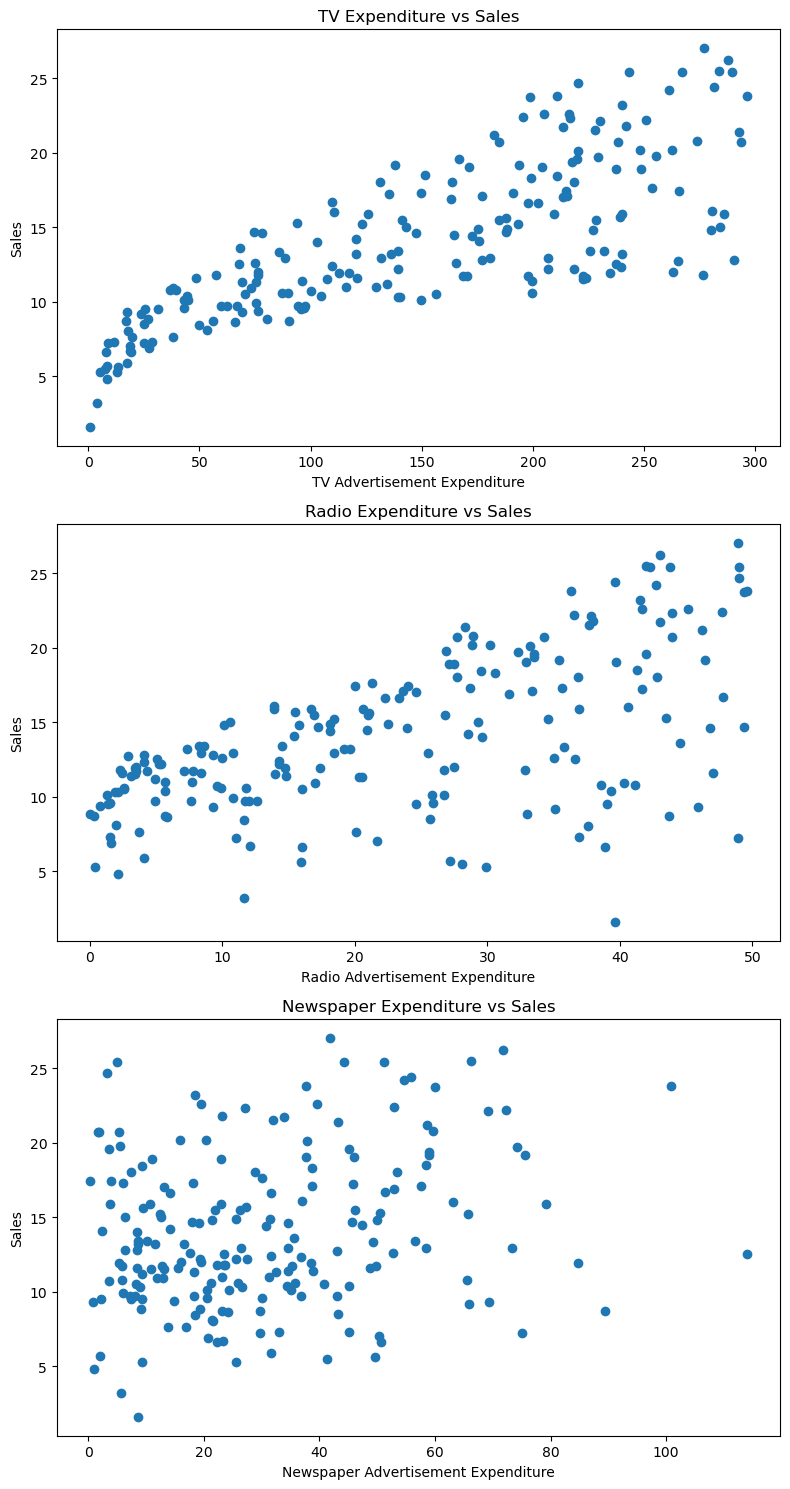

In [3]:
fig, axes = plt.subplots(figsize =(8, 15), nrows = 3, ncols = 1, dpi = 100)

axes[0].plot(df["TV"], df["sales"], "o")
axes[0].set_xlabel("TV Advertisement Expenditure")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Expenditure vs Sales")

axes[1].plot(df["radio"], df["sales"], "o")
axes[1].set_xlabel("Radio Advertisement Expenditure")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Expenditure vs Sales")

axes[2].plot(df["newspaper"], df["sales"], "o")
axes[2].set_xlabel("Newspaper Advertisement Expenditure")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Expenditure vs Sales")

plt.tight_layout();


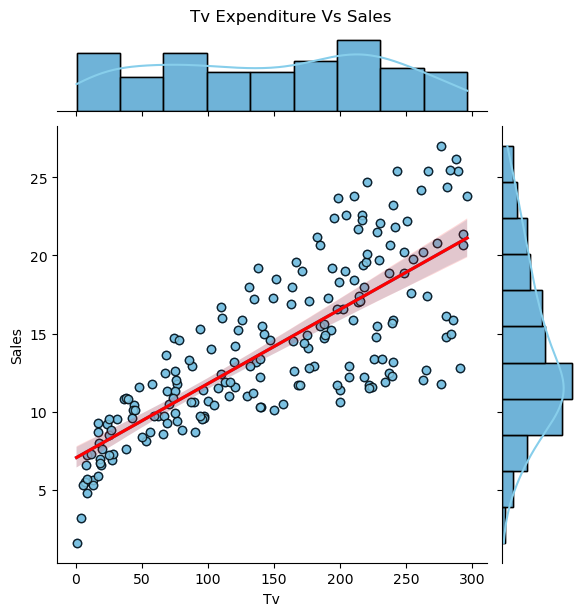

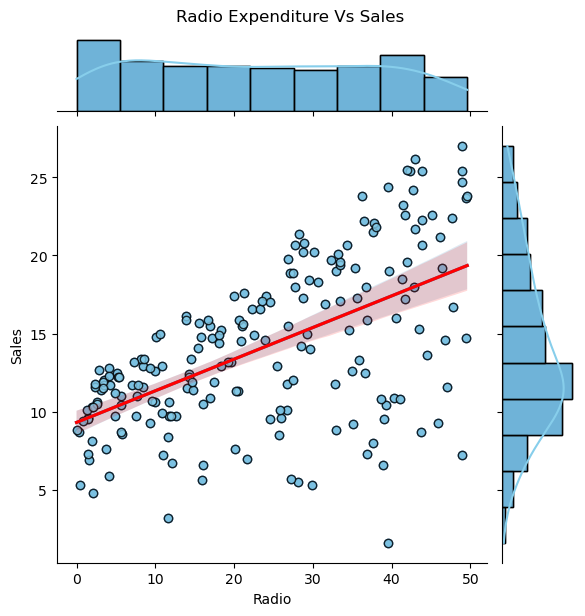

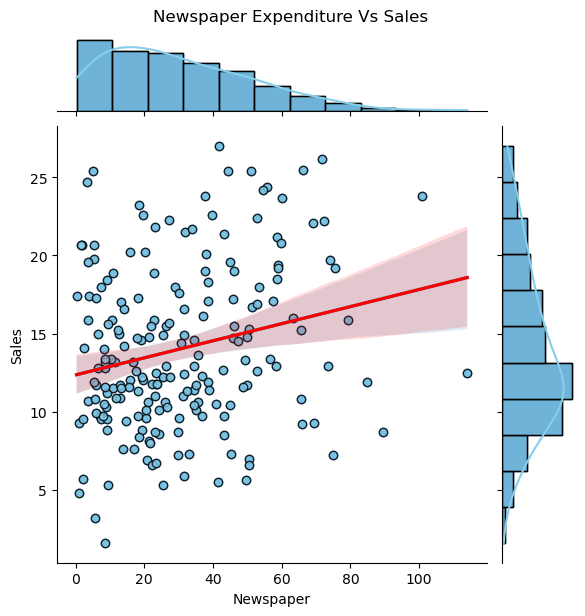

In [4]:

for var in df.drop("sales", axis =1).columns:
    g = sns.JointGrid(
            data = df,
            x = var, 
            y = "sales"
            )
    g = g.plot(sns.regplot, sns.histplot)
    g.plot_marginals(sns.histplot, kde = True, color = "skyblue")
    
    sns.regplot(
        data = df, 
        x = var,
        y = "sales",
        ax = g.ax_joint,
        scatter_kws= {"color": "skyblue", "edgecolor": "black"},
        line_kws= {"color": "red"}
        )
    g.set_axis_labels(f"{var.capitalize()}", "Sales")
    g.figure.suptitle(f"{var.capitalize()} Expenditure Vs Sales", y = 1.02)

In [5]:
X = df.drop("sales", axis = 1)
y = df["sales"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 101
    )

In [7]:
# help(train_test_split)

In [8]:
# help(LinearRegression)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
df["sales"].mean()

14.0225

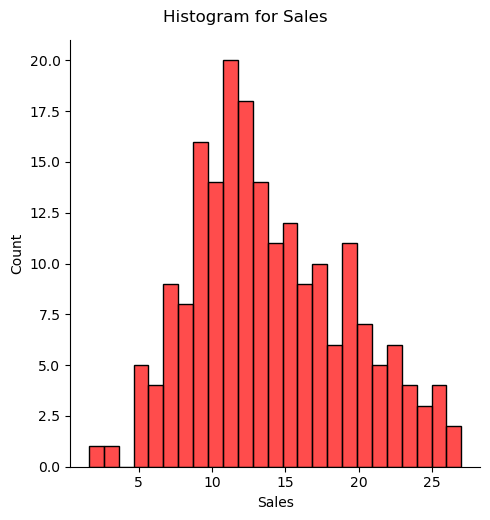

In [12]:
plot = sns.displot(
    data = df,
    x = "sales",
    color = "red",
    alpha = 0.7,
    bins = 25
)
plot.set_axis_labels("Sales", "Count")
plot.figure.suptitle("Histogram for Sales", y = 1.03);

In [13]:
predictions = model.predict(X_test)

In [14]:
print("The mean squared error: ", mean_squared_error(y_test, predictions))
print("The mean absolute error: ", mean_absolute_error(y_test, predictions))
print("The root mean squared error: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("The r squared: ", r2_score(y_test, predictions ))

The mean squared error:  2.298716697886379
The mean absolute error:  1.2137457736144805
The root mean squared error:  1.5161519375993882
The r squared:  0.9185780903322445


In [15]:
# help(r2_score)

In [16]:
test_residuals = y_test - predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

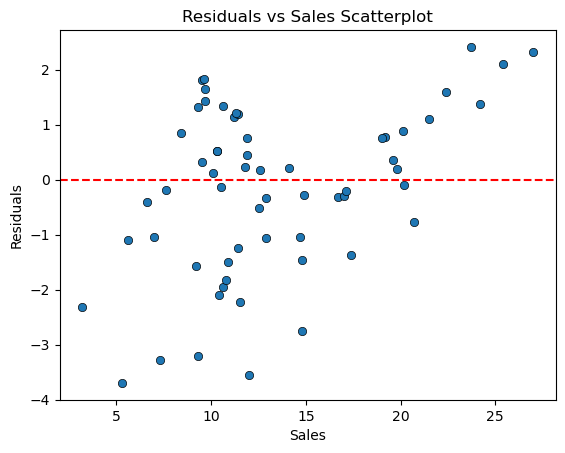

In [24]:
sns.scatterplot(x = y_test, y = test_residuals, edgecolor = "black")
plt.axhline(y = 0, color = "red", ls = "--")
plt.xlabel("Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Sales Scatterplot");

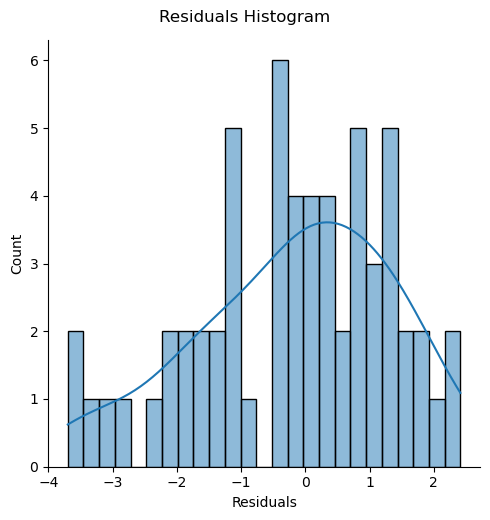

In [21]:
plot = sns.displot(
    test_residuals, 
    bins = 25, 
    kde = True
    )

plot.set_axis_labels("Residuals", "Count")
plot.figure.suptitle("Residuals Histogram", y = 1.03);

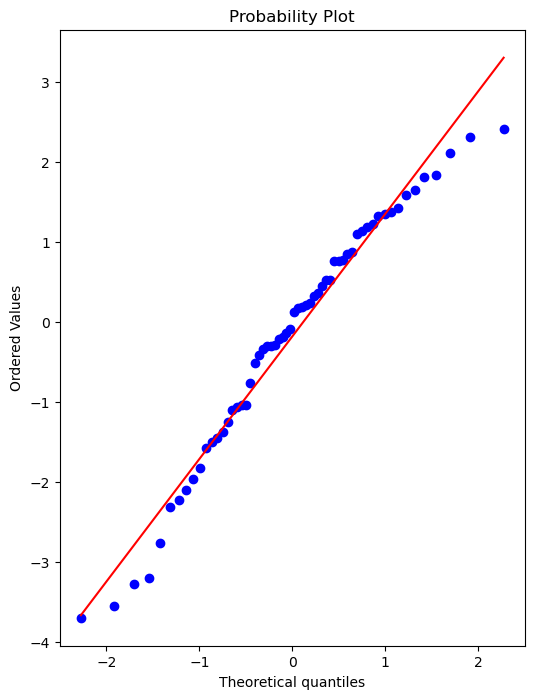

In [18]:
# Create a figure and axis to plot on 
fig, ax = plt.subplots(figsize = (6, 8), dpi = 100)
# probplot returns the raw values if needed
# we just wnat to see the plot, so we assign these values to _
_ = stats.probplot(test_residuals, plot = ax)


In [25]:
final_model = LinearRegression()

In [26]:
final_model.fit(X, y)

LinearRegression()

In [27]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [28]:
y_hat = final_model.predict(X)

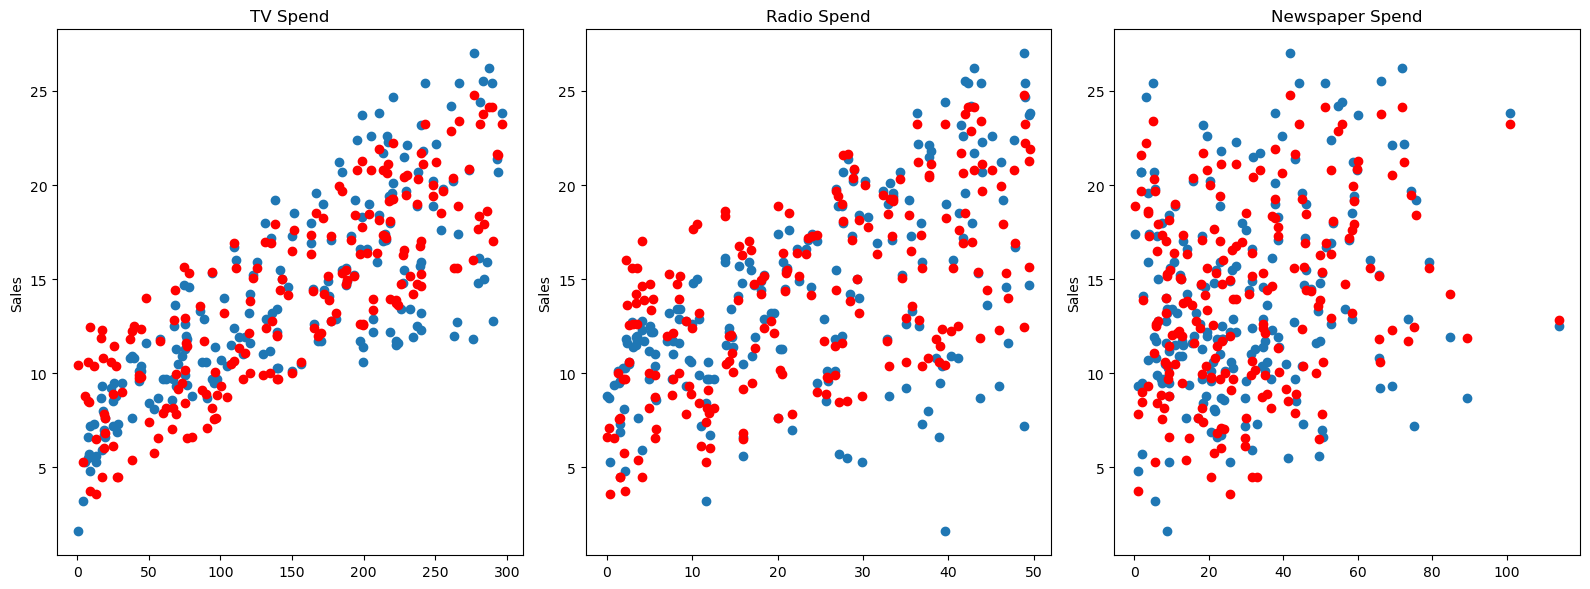

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

axes[0].plot(df["TV"], df["sales"], "o")
axes[0].plot(df["TV"], y_hat, "o", color = "red")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"], df["sales"], "o")
axes[1].plot(df["radio"], y_hat, "o", color = "red")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df["newspaper"], df["sales"], "o")
axes[2].plot(df["newspaper"], y_hat, "o", color = "red")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

plt.tight_layout();

## Model Deployment

In [ ]:
with open("linear_model.pkl", "wb") as f:
    pickle.dump(final_model, f)